# Time Series (LSTM)

In [1]:
# Install required libraries (uncomment if needed)
#!pip install yfinance tensorflow scikit-learn matplotlib


In [2]:
# 📅 Create or load a time series dataset.
# 🧹 Preprocess the data (lag features, train-test split).
# 🤖 Train a machine learning model (e.g., Random Forest).
# 📈 Forecast future values.
# 📊 Analyze and visualize the results.

In [4]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings("ignore")

In [5]:
# ---------------------------
# 1. Retrieve External Dataset (Stock Prices - Apple Inc.)
# ---------------------------
df = yf.download("AAPL", start="2020-01-01", end="2024-01-01") # Apple stock prices
data = df[['Close']].values # use closing prices

[*********************100%***********************]  1 of 1 completed


In [8]:
# ---------------------------
# 2. Preprocess Data
# ---------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
# Function to create sequences
def create_dataset(dataset, time_step=60):
 X, y = [], []
 for i in range(len(dataset) - time_step - 1):
     X.append(dataset[i:(i + time_step), 0])
     y.append(dataset[i + time_step, 0])
 return np.array(X), np.array(y)
time_step = 60 # using past 60 days to predict next day
X, y = create_dataset(scaled_data, time_step)
# Reshape input for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)
# Split into train/test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [9]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

756 756 189 189


In [10]:
# ---------------------------
# 3. Build LSTM Model
# ---------------------------
model = Sequential([
 LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
 LSTM(50, return_sequences=False),
 Dense(25),
 Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
# Train model
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0996
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0051
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0026
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0021
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0017
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0017
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0017
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0016
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0017
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0016


In [11]:
# ---------------------------
# 4. Make Predictions
# ---------------------------
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# Inverse transform to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


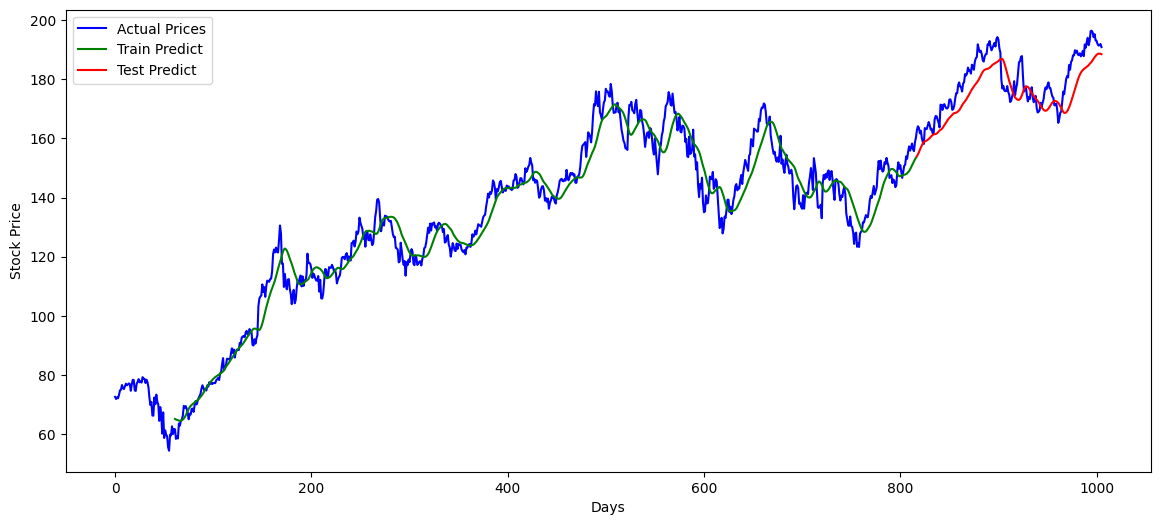

In [12]:
# ---------------------------
# 5. Plot Results
# ---------------------------
train_len = len(train_predict)
test_len = len(test_predict)
plt.figure(figsize=(14,6))
plt.plot(data, label="Actual Prices", color='blue')
# Training predictions
plt.plot(range(time_step+1, train_len+time_step+1), train_predict, label="Train Predict", color='green')
# Testing predictions (align length with test_predict)
plt.plot(range(len(data) - len(test_predict), len(data)), test_predict, label="Test Predict", color='red')
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


<!-- Time Series Forecasting using Machine Learning
📅 Create or load a time series dataset.
🧹 Preprocess the data (lag features, train-test split).
🤖 Train a machine learning model (e.g., Random Forest).
📈 Forecast future values.
📊 Analyze and visualize the results. -->




---

# Time Series Forecasting using Machine Learning




In [13]:
# 📅 Create or load a time series dataset.
# 🧹 Preprocess the data (lag features, train-test split).
# 🤖 Train a machine learning model (e.g., Random Forest).
# 📈 Forecast future values.
# 📊 Analyze and visualize the results.

### 1. Generate Sample Time Series Dataset

In [14]:
import pandas as pd
import numpy as np
# Generate a date range
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
# Simulate daily sales with trend + seasonality + noise
np.random.seed(42)
sales = 200 + 0.5 * np.arange(len(date_range)) + 20 * np.sin(2 * np.pi * date_range.dayofyear / 365) + np.random.normal(0, 10, len(date_range))
# Create DataFrame
df = pd.DataFrame({'date': date_range, 'sales': sales})
df.set_index('date', inplace=True)
df.head()

,sales
date,
2022-01-01,205.311409
2022-01-02,199.805789
2022-01-03,208.509279
2022-01-04,218.106347
2022-01-05,201.377762


### 2. Feature Engineering: Lag Features

In [15]:
# Create lag features
for lag in range(1, 8): # 1 to 7 days lag
 df[f'lag_{lag}'] = df['sales'].shift(lag)
# Drop missing values
df.dropna(inplace=True)

### 3. Train-Test Split

In [16]:
# Split into train and test
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]
X_train = train.drop('sales', axis=1)
y_train = train['sales']
X_test = test.drop('sales', axis=1)
y_test = test['sales']

### 4. Train a Machine Learning Model. We'll use a Random Forest Regressor for forecasting.

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)

### 5. Evaluation and Visualization

Mean Squared Error: 1202.09
Mean Absolute Error: 30.62


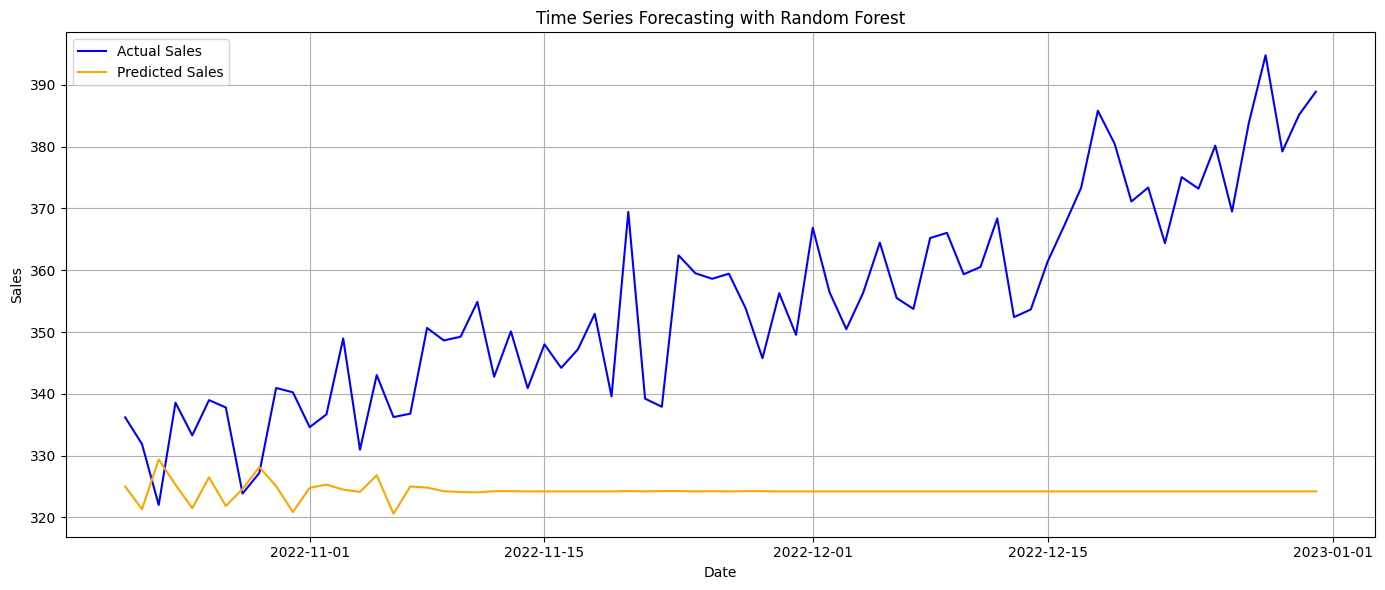

In [18]:
import matplotlib.pyplot as plt
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Sales', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Sales', color='orange')
plt.title('Time Series Forecasting with Random Forest')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

MSE: 853.3489259055302


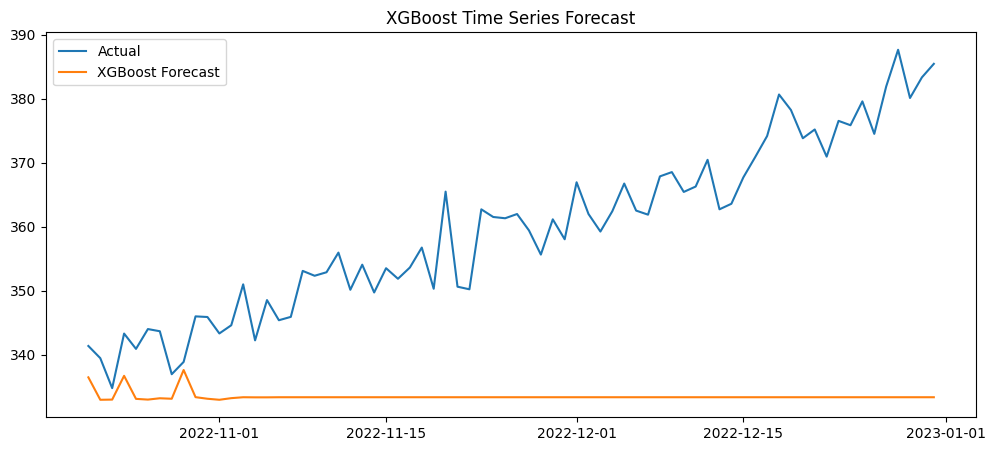

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Simulate time series data
np.random.seed(42)
date_range = pd.date_range(start='2022-01-01', end='2022-12-31')
sales = 200 + 0.5*np.arange(len(date_range)) + 10*np.sin(2*np.pi*date_range.dayofyear/365) + np.random.normal(0, 5, len(date_range))
df = pd.DataFrame({'date': date_range, 'sales': sales}).set_index('date')
# Create lag features
for lag in range(1, 8):
 df[f'lag_{lag}'] = df['sales'].shift(lag)
df.dropna(inplace=True)
# Train-test split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
X_train, y_train = train.drop('sales', axis=1), train['sales']
X_test, y_test = test.drop('sales', axis=1), test['sales']
# Train XGBoost
model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='XGBoost Forecast')
plt.legend()
plt.title("XGBoost Time Series Forecast")
plt.show()


# LSTM for Time Series Forecasting.

In [21]:
# Key Steps:
# Normalize and reshape data
# Create sequences of time steps
# Train LSTM model using Keras

In [22]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [24]:
# Generate synthetic time series
date_range = pd.date_range(start='2022-01-01', end='2022-12-31')
data = 200 + 0.5*np.arange(len(date_range)) + 10*np.sin(2*np.pi*date_range.dayofyear/365) + np.random.normal(0, 5, len(date_range))
df = pd.DataFrame({'sales': data}, index=date_range)
# Normalize
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
# Create sequences
def create_sequences(data, time_steps=10):
 X, y = [], []
 for i in range(len(data) - time_steps):
     X.append(data[i:i+time_steps])
     y.append(data[i+time_steps])
 return np.array(X), np.array(y)
X, y = create_sequences(scaled, 10)
X = X.reshape((X.shape[0], X.shape[1], 1))
# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
# Predict
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step


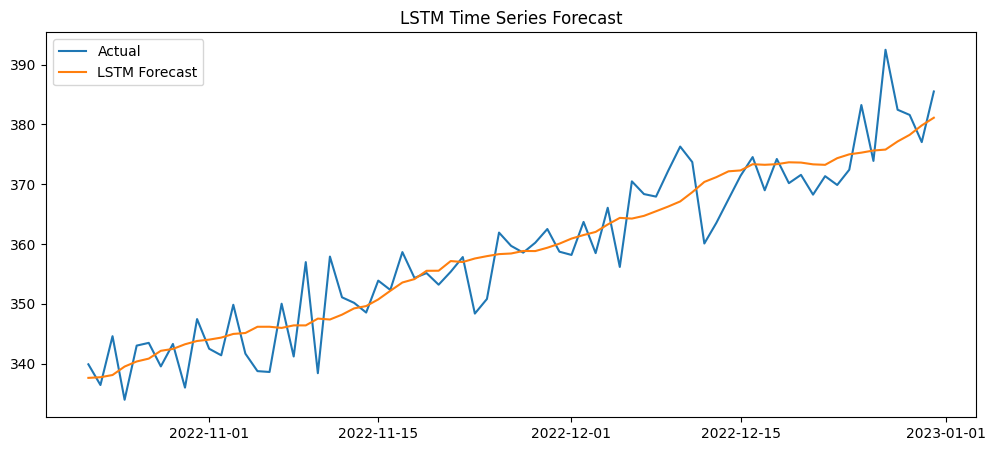

In [25]:
# Plot
plt.figure(figsize=(12, 5))
plt.plot(df.index[-len(y_test):], y_test_inv, label='Actual')
plt.plot(df.index[-len(y_test):], y_pred_inv, label='LSTM Forecast')
plt.legend()
plt.title("LSTM Time Series Forecast")
plt.show()

# Analysis & Insights
### Lag Features: Help the model understand recent trends (e.g., yesterday’s sales).
### Random Forest: Captures nonlinear relationships and interactions between lags.
### Performance: MAE and MSE give a sense of prediction accuracy. You can compare this with
### naive models (e.g., yesterday = today).
### Visualization: Helps identify if the model captures seasonality and trends.